# Matplotlib
---
Datasets found in code_book/Python/data folder.

- austin_weather.csv
- seattle_weather.csv
- climate_change.csv
- medals_by_country_2016.csv
- summer_2016.csv

## Quick Reference

|                 Command                  |                                                                                                                          |
|  --------------------------------------: | ------------------------------------------------------------------------------------------------------------------------ |
|       `ax.set_title('Title of Plot')`       | creates a **title** for the plot                                                                                         |
|     `ax.set_xlabel('Label for X-Axis')`     | creates a label for the **x-axis**                                                                                       |
|     `ax.set_ylabel('Label for Y-Axis')`     | creates a label for the **y-axis**                                                                                       |
|         `plt.xlim(x_min, x_max)`         | resizes the **x limits** of the graph                                                                                    |
|         `plt.ylim(y_min, y_max)`         | resizes the **y limits** of the graph                                                                                    |
| `plt.axis((x_min, x_max, y_min, y_max))` | resizes the **x and y limits** of the graph, can use 'equal', 'square' or 'tight' parameters                             |
|        `plt.margins(buffer_pct)`         | creates a **margin** around the plot to keep data off of the edges                                                       |
|           `plt.tight_layout()`           | improves the **spacing** between subplots                                                                                |
|     `plt.legend(loc='upper right')`      | creates a **legend** for the plot; use the 'label' parameter in each **plt** command to specify a different legend label |

## Notebook Setup

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# used to convert 'DATE' columns (int representing month) to month labels
import calendar

In [128]:
# importing data used in this notebook

# reading in austin data, creating 'month' column, and creating a subset of austin weather for visualizations
austin = pd.read_csv('../data/austin_weather.csv')
austin['MONTH'] = austin['DATE'].apply(lambda x: calendar.month_abbr[x])
austin_weather = austin[austin['STATION'] == 'USW00013904']

# reading in seattle data, creating a 'month' column, and creating a subset of seattle weather for visualizations
seattle = pd.read_csv('../data/seattle_weather.csv') 
seattle['MONTH'] = seattle['DATE'].apply(lambda x: calendar.month_abbr[x])
seattle_weather = seattle[seattle['STATION'] == 'USW00094290']

climate_change = pd.read_csv('../data/climate_change.csv', parse_dates=['date'], index_col=['date'])

summer_2016_medals = pd.read_csv('../data/medals_by_country_2016.csv')

# reading in medals_2016 data and creating subsets for mens rowing and mens gymnastics
summer_2016 = pd.read_csv('../data/summer2016.csv')
mens_rowing = summer_2016[(summer_2016['Sport'] == 'Rowing') & (summer_2016['Sex'] == 'M')]
mens_gymnastics = summer_2016[(summer_2016['Sport'] == 'Gymnastics') & (summer_2016['Sex'] == 'M')]

## Examples

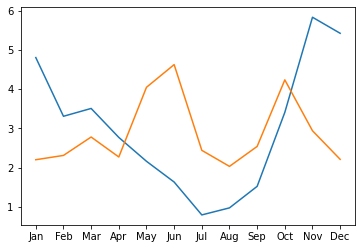

In [95]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function
plt.show()

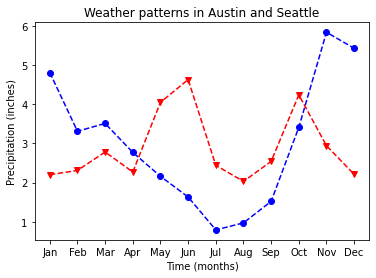

In [96]:
# displaying plot with color, marker, and linestyle properties defined.
# the xlabel, ylabel, and titles are also defined.

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b', marker='o', linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r', marker='v', linestyle='--')

# Customize the x-axis label
ax.set_xlabel('Time (months)')

# Customize the y-axis label
ax.set_ylabel('Precipitation (inches)')

# Add the title
ax.set_title('Weather patterns in Austin and Seattle')

# Display the figure
plt.show()

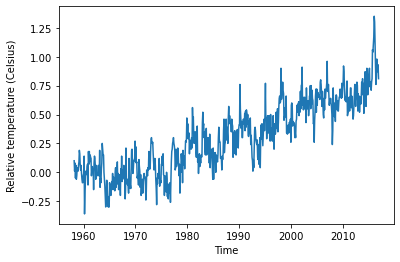

In [97]:
# using datetime.index for time series plot
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

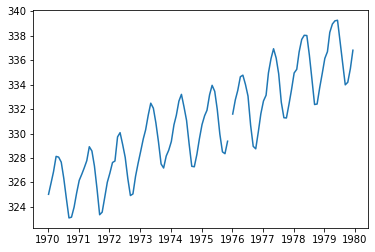

In [98]:
# subsetting datetime index in order to plot a specific time period
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change['1970-01-01':'1979-12-31']

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

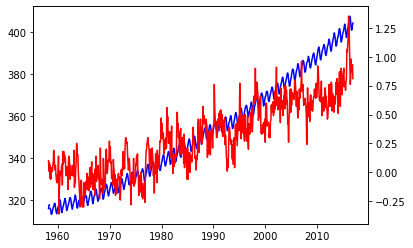

In [100]:
# plotting two variables on twin axes that share the x-axis
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()

In [101]:
# creating a function that plots timeseries by passing relevant data attributes
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

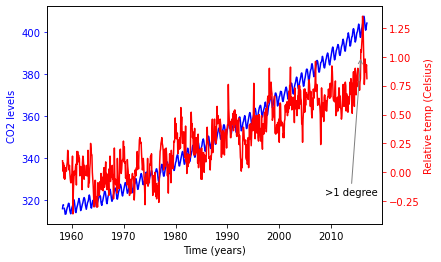

In [102]:
# creating annotations on the viz, including text, text placement, and arrow properties
# utilizing user defined plot_timeseries() function
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree",
    # defines the point of data we are interested in annotating
    xy=(pd.Timestamp('2015-10-06'),1),
    
    # positions the text so it does not sit on top of the xy coordinate provided
    xytext=(pd.Timestamp('2008-10-06'), -0.2),
    
    # provides arrow properties displayed on the viz
    arrowprops={'arrowstyle':'->', 'color':'gray'}
    )

plt.show()

<ipython-input-118-f61a22fa16a9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


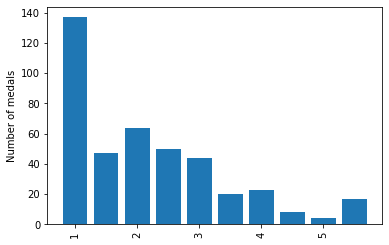

In [118]:
# creating a bar chart with x-tick labels defined
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

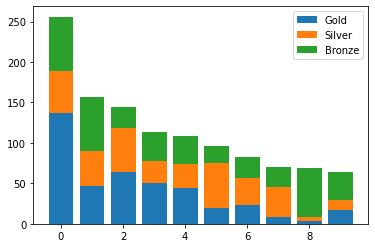

In [119]:
# creating a stacked bar chart with a legend
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'], label='Bronze')

# Display the legend
ax.legend()

plt.show()

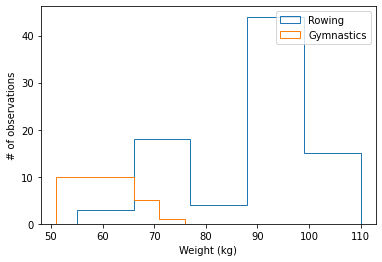

In [120]:
# creates a histogram with labeled historgrams, binned in 5 groups, and showing transparent histograms using histtype='step'
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], label='Rowing', histtype='step', bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], label='Gymnastics', histtype='step', bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()

plt.show()

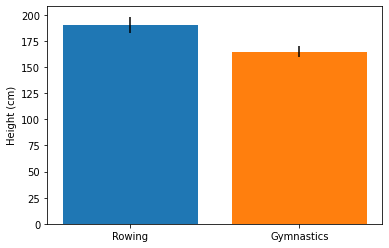

In [121]:
# using ax.bar() will create error wiskers on top of a bar chart
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar('Gymnastics', mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

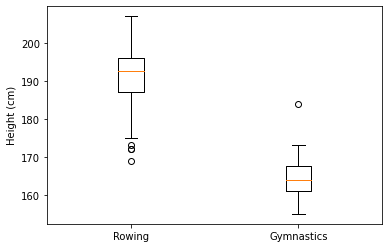

In [122]:
# creates boxplot graph w/two boxes, with each having specific labeled xtick labels
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

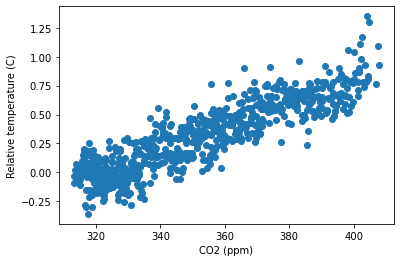

In [123]:
# creating a scatter plot with two variables being displayed 
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

<ipython-input-126-c2cdc7ef8008>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


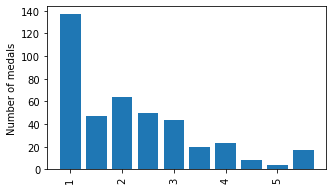

In [126]:
# creates a visualization and saves it using fig.savefig()
fig, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")

# sets the figure size in inches, width by height
fig.set_size_inches([5,3])

# save as a PNG file
fig.savefig("../data/viz/gold_medals.png")

# Save as a PNG file with 300 dpi
fig.savefig('../data/viz/my_figure_300dpi.png', dpi=300)

# save as JPG file w/half of quality/size
fig.savefig("../data/viz/gold_medals.jpg", pil_kwargs={'quality': 50})

# save as SVG file
fig.savefig("../data/viz/gold_medals.svg")

<ipython-input-139-e2ec38bdfc38>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


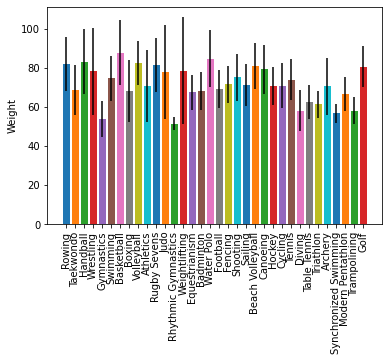

In [139]:
# creating a loop that cycles through list of sports, and creates a viz for each one 
fig, ax = plt.subplots()

# Extract the "Sport" column
sports_column = summer_2016['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Loop over the different sports branches
for sport in sports:
    
  # Extract the rows only for this sport
  sport_df = summer_2016[summer_2016['Sport'] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig('../data/viz/sports_weights.png', bbox_inches="tight", pad_inches=3)

In [142]:
medals

,Unnamed: 0,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55
3,Russia,35,50,28
4,China,35,44,30
5,France,21,20,55
6,Australia,25,23,34
7,Italy,24,8,38
8,Canada,61,4,4
9,Japan,34,17,13
